### 서울시 구별 CCTV 현황 분석

In [41]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import math
from matplotlib import cm
import sys                                               ## 파이썬 엔진에 대한 정보를 관리하는 모듈을 사용한다. 
from matplotlib import font_manager, rc                  ## 폰트를 관리하는 함수와 설정 함수를 사용한다.

if sys.platform  == 'darwin':                             ## MAC OS의 이름을 확인한다.
    path = '.....'  
elif sys.platform == 'win32':                             ## Windows 이름을 확인한다.
    # path = "font/THEdog.ttf"
    path = "C:\\ph\\PYDATAexam\\font\\MaplestoryBold.ttf"
    # path = "font/HoonWhitecatR.ttf"
    # path = "font/malgun.ttf"
else:
    print('Unknown system... sorry~~~~') 
    
font_name = font_manager.FontProperties(fname=path).get_name()        ##  폰트가 있는지를 확인한다. 
rc('font', family=font_name)                                          ## 한글 폰트를 시각화 환경에 세팅한다.
print(font_name)
plt.rcParams['axes.unicode_minus'] = False                            # rcParams = 전역적으로 설정을 바꾼다. "axes.unicode_minus" = 음의 값 -의 폰트를 잘 읽을 수 있도록

Maplestory


In [42]:
cctv_seoul = pd.read_csv("data/서울CCTV현황.csv", index_col = 0)
column = ["행정구역별", "주소", "사용목적", "lat", "lng", "갯수", "UpdateDate"]
cctv_seoul.columns = column
cctv_seoul_total = pd.DataFrame(cctv_seoul["행정구역별"].value_counts())
cctv_seoul_total.reset_index(drop = False, inplace = True)
cctv_seoul_total.columns = ["행정구역별", "CCTV총합"]
total = cctv_seoul_total["CCTV총합"].sum()
cctv_seoul_total.loc[len(cctv_seoul_total)] = ["", ""]
cctv_seoul_total = cctv_seoul_total.shift(1)
cctv_seoul_total.iloc[0] = ["서울특별시", total]
cctv_seoul_total.sort_values("CCTV총합", ascending=False).head(6)

,행정구역별,CCTV총합
0,서울특별시,59483
1,강남구,6766
2,관악구,4647
3,구로구,4329
4,영등포구,3775
5,은평구,3541


In [43]:
pop_seoul = pd.read_csv("data/인구__가구_및_주택__읍면동_2015_2020___시군구_20162019__20220603165301.csv", encoding="cp949")
pop_seoul_2020 = pd.DataFrame(pop_seoul[["행정구역별(읍면동)", "2020", "2020.1", "2020.2"]])
column1 = ["행정구역별", "총인구(명)", "남자(명)", "여자(명)"]
pop_seoul_2020.drop(0, inplace = True)
pop_seoul_2020.columns = column1
pop_seoul_2020.sort_values("총인구(명)", ascending=False).head(6)

,행정구역별,총인구(명),남자(명),여자(명)
1,서울특별시,9586195,4647733,4938462
25,송파구,643288,309802,333486
17,강서구,564854,271779,293075
12,노원구,511982,246317,265665
24,강남구,508135,243322,264813
22,관악구,502641,250850,251791


In [44]:
pop_cctv_seoul = pd.merge(pop_seoul_2020, cctv_seoul_total, how="left", on="행정구역별")
pop_cctv_seoul[["총인구(명)", "남자(명)", "여자(명)", "CCTV총합"]] = pop_cctv_seoul[["총인구(명)", "남자(명)", "여자(명)", "CCTV총합"]].astype(int)
pop_cctv_seoul.set_index("행정구역별", inplace=True)
pop_cctv_seoul.head()

,총인구(명),남자(명),여자(명),CCTV총합
행정구역별,,,,
서울특별시,9586195,4647733,4938462,59483
종로구,151291,73062,78229,1649
중구,128744,62147,66597,908
용산구,225882,109162,116720,909
성동구,291918,142128,149790,1302


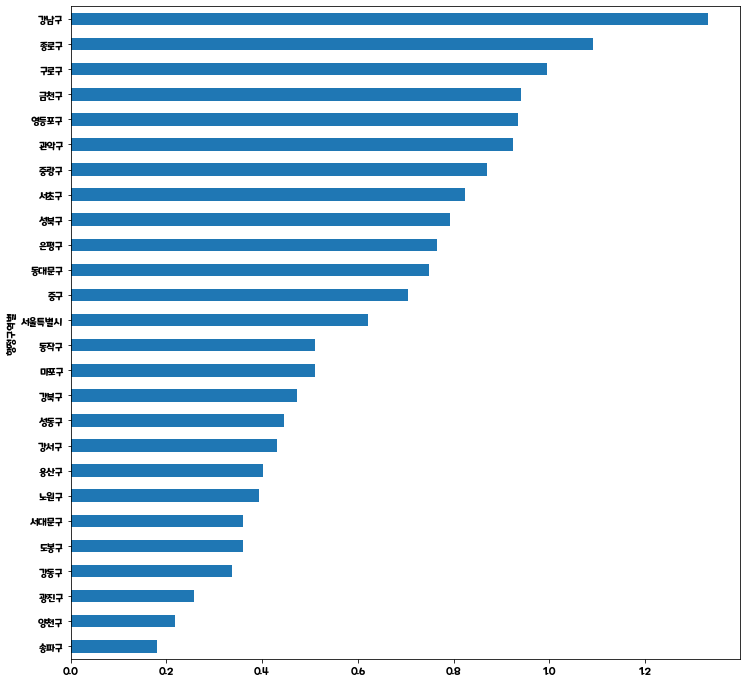

In [45]:
pop_cctv_seoul["인구대비CCTV비율"] = pop_cctv_seoul["CCTV총합"] / pop_cctv_seoul["총인구(명)"] * 100
plt.figure(figsize=(12, 12))
pop_cctv_seoul["인구대비CCTV비율"].sort_values().plot(kind = "barh")
plt.show()

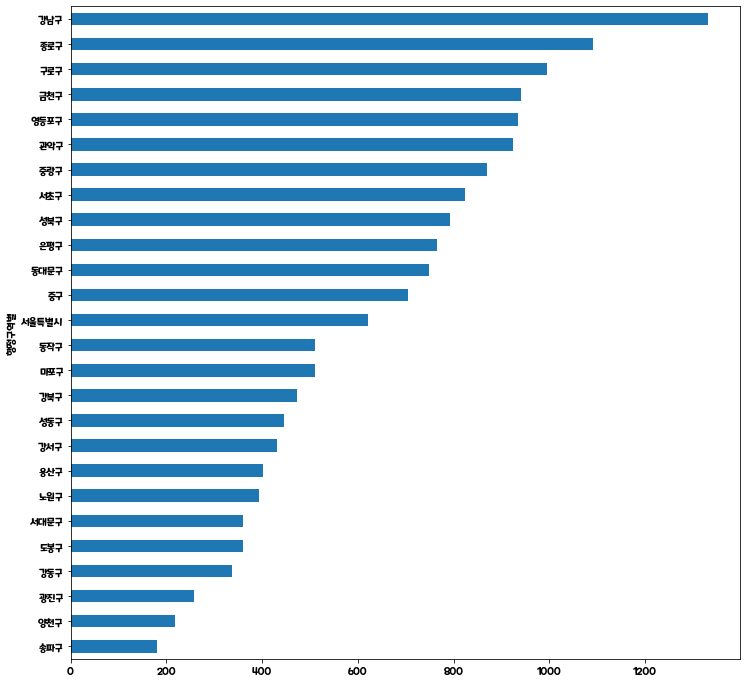

In [46]:
pop_cctv_seoul["인구10만명당CCTV갯수"] = pop_cctv_seoul["CCTV총합"] / pop_cctv_seoul["총인구(명)"] * 100000
plt.figure(figsize=(12, 12))
pop_cctv_seoul["인구10만명당CCTV갯수"].sort_values().plot(kind = "barh")
plt.show()

### 서울시 파출소(지구대 포함)수 및 위치 현황

In [47]:
police_substation = pd.read_csv("data/경찰청_전국 경찰관서 현황_20211231.csv", encoding="cp949")
police_substation.set_index("연번", inplace=True)
police_substation_seoul = police_substation.loc[police_substation["전체기관명"].str.contains("서울")]
name_list = police_substation_seoul["전체기관명"].str.split(" ", expand=True)
name_list.drop(0, axis = 1, inplace=True)
name_list.columns = ["경찰청명", "지역구경찰서명", "관서명"]
police_substation_seoul = pd.concat([police_substation_seoul, name_list], axis = 1)
police_substation_seoul

,전체기관명,도로명주소,경찰청명,지역구경찰서명,관서명
연번,,,,,
1239,경찰청 서울특별시경찰청,서울특별시 종로구 사직로8길 31,서울특별시경찰청,None,None
1240,경찰청 서울특별시경찰청 서울강남경찰서,서울특별시 강남구 테헤란로 114길 11,서울특별시경찰청,서울강남경찰서,None
1241,경찰청 서울특별시경찰청 서울강남경찰서 논현1파출소,서울특별시 강남구 학동로 169,서울특별시경찰청,서울강남경찰서,논현1파출소
1242,경찰청 서울특별시경찰청 서울강남경찰서 논현2파출소,서울특별시 강남구 학동로 227,서울특별시경찰청,서울강남경찰서,논현2파출소
1243,경찰청 서울특별시경찰청 서울강남경찰서 삼성1파출소,서울특별시 강남구 영동대로 112길 4,서울특별시경찰청,서울강남경찰서,삼성1파출소
...,...,...,...,...,...
1508,경찰청 서울특별시경찰청 서울혜화경찰서 명륜파출소,서울특별시 종로구 성균관로 78,서울특별시경찰청,서울혜화경찰서,명륜파출소
1509,경찰청 서울특별시경찰청 서울혜화경찰서 종로5가파출소,서울특별시 종로구 동호로 407,서울특별시경찰청,서울혜화경찰서,종로5가파출소
1510,경찰청 서울특별시경찰청 서울혜화경찰서 창신파출소,서울특별시 종로구 지봉로13길 20-12,서울특별시경찰청,서울혜화경찰서,창신파출소


In [48]:
location_list = police_substation_seoul["도로명주소"].str.split(" ", expand=True)
location_list.rename(columns={1: "행정구역별"}, inplace=True)
location_list = location_list["행정구역별"]
police_substation_seoul = pd.concat([police_substation_seoul, location_list], axis = 1)
police_substation_seoul.head()

,전체기관명,도로명주소,경찰청명,지역구경찰서명,관서명,행정구역별
연번,,,,,,
1239,경찰청 서울특별시경찰청,서울특별시 종로구 사직로8길 31,서울특별시경찰청,None,None,종로구
1240,경찰청 서울특별시경찰청 서울강남경찰서,서울특별시 강남구 테헤란로 114길 11,서울특별시경찰청,서울강남경찰서,None,강남구
1241,경찰청 서울특별시경찰청 서울강남경찰서 논현1파출소,서울특별시 강남구 학동로 169,서울특별시경찰청,서울강남경찰서,논현1파출소,강남구
1242,경찰청 서울특별시경찰청 서울강남경찰서 논현2파출소,서울특별시 강남구 학동로 227,서울특별시경찰청,서울강남경찰서,논현2파출소,강남구
1243,경찰청 서울특별시경찰청 서울강남경찰서 삼성1파출소,서울특별시 강남구 영동대로 112길 4,서울특별시경찰청,서울강남경찰서,삼성1파출소,강남구


In [49]:
police_substation_seoul1 = pd.DataFrame(police_substation_seoul["행정구역별"].value_counts())
police_substation_seoul1.columns = ["행정구역별관서합계"]
police_substation_seoul1.index.name = "행정구역별"
police_substation_seoul1.loc["서울특별시"] = police_substation_seoul1["행정구역별관서합계"].sum()
pop_cctv_seoul = pd.merge(pop_cctv_seoul, police_substation_seoul1, how="left", on="행정구역별")
pop_cctv_seoul

,총인구(명),남자(명),여자(명),CCTV총합,인구대비CCTV비율,인구10만명당CCTV갯수,행정구역별관서합계
행정구역별,,,,,,,
서울특별시,9586195,4647733,4938462,59483,0.620507,620.506885,274
종로구,151291,73062,78229,1649,1.089952,1089.952476,23
중구,128744,62147,66597,908,0.705276,705.275586,17
용산구,225882,109162,116720,909,0.402423,402.422504,8
성동구,291918,142128,149790,1302,0.446016,446.015662,10
광진구,353967,169925,184042,912,0.257651,257.651137,11
동대문구,351057,171484,179573,2630,0.749166,749.166090,12
중랑구,385663,189537,196126,3354,0.869671,869.671190,9
성북구,438833,209682,229151,3478,0.792557,792.556622,12


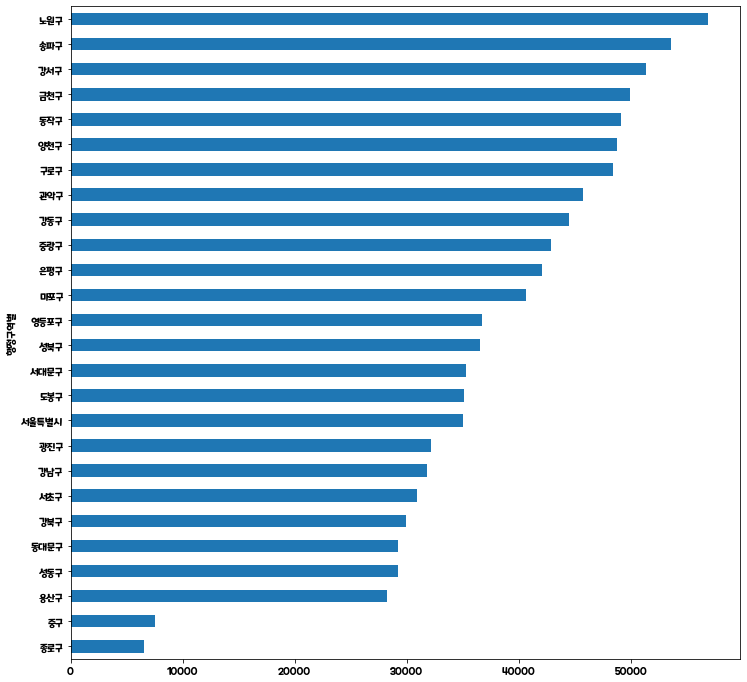

In [50]:
pop_cctv_seoul["1개소당책임인구"] = pop_cctv_seoul["총인구(명)"] / pop_cctv_seoul["행정구역별관서합계"]
pop_cctv_seoul.sort_values("1개소당책임인구", ascending=False).head(6)
plt.figure(figsize=(12, 12))
pop_cctv_seoul["1개소당책임인구"].sort_values().plot(kind = "barh")
plt.show()

In [51]:
pop_cctv_seoul.reset_index(drop=False, inplace=True)
pop_cctv_seoul.drop(0, inplace=True)
pop_cctv_seoul

,행정구역별,총인구(명),남자(명),여자(명),CCTV총합,인구대비CCTV비율,인구10만명당CCTV갯수,행정구역별관서합계,1개소당책임인구
1,종로구,151291,73062,78229,1649,1.089952,1089.952476,23,6577.869565
2,중구,128744,62147,66597,908,0.705276,705.275586,17,7573.176471
3,용산구,225882,109162,116720,909,0.402423,402.422504,8,28235.250000
4,성동구,291918,142128,149790,1302,0.446016,446.015662,10,29191.800000
5,광진구,353967,169925,184042,912,0.257651,257.651137,11,32178.818182
6,동대문구,351057,171484,179573,2630,0.749166,749.166090,12,29254.750000
7,중랑구,385663,189537,196126,3354,0.869671,869.671190,9,42851.444444
8,성북구,438833,209682,229151,3478,0.792557,792.556622,12,36569.416667
9,강북구,299535,144779,154756,1417,0.473067,473.066587,10,29953.500000
10,도봉구,315979,153080,162899,1136,0.359518,359.517563,9,35108.777778


In [52]:
import json
import folium
seoul_geo = json.load(open('data/geodata.json', encoding='utf-8'))
seoul_map = folium.Map(location=[37.5502, 126.982],zoom_start=11,tiles='Stamen Toner')

folium.Choropleth(
    geo_data=seoul_geo,
    data=pop_cctv_seoul,
    columns=['행정구역별', '인구10만명당CCTV갯수'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    legend_name='인구 10만명당 CCTV 설치 현황'
).add_to(seoul_map)

seoul_map

In [54]:
seoul_geo = json.load(open('data/geodata.json', encoding='utf-8'))
seoul_map = folium.Map(location=[37.5502, 126.982],zoom_start=11,tiles='Stamen Toner')
folium.Choropleth(
    geo_data=seoul_geo,
    data=pop_cctv_seoul,
    columns=['행정구역별', '1개소당책임인구'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    legend_name='1개소당 책임인구'
).add_to(seoul_map)

seoul_map